This is a narrative analysis for League of Legends in-game monster Rift Herald.

League of Legends is a MOBA(Multipleplayer Online Battle Arena) game. For deatil about this game, please refer to below link. 
https://en.wikipedia.org/wiki/League_of_Legends

From time to time, League of Legends undergone multiple major patch updates and the game had shifted dramatically since Season 1. On November 11, 2015(Patch V5.22), Rift Herald is introduced to the game as new monster. Please click below link for detail of Rift Herald. 
http://leagueoflegends.wikia.com/wiki/Rift_Herald

The intension of introducing Rift Herald to game is to have an in-game monster that is equivalent to dragons in the ealy game (Before 20 minutes. Rift Herald spawns at the 9:50 mark. If Rift Herald is not taken, it will be despawned permanently at 19:45/19:55). Due to the buff of summoned Rift Herald, it can due 40% of its current health to towers, which can easily take down a tower in early game. 

Taking down a tower early game could lead to shorter game length since the game may finish earlier. Therefore, we will take a look at how the introduction of Rift Herald will influence game length. If we see game length difference between games with taken down Rift Herald and not taken Rift Herald, then we will obtain the average game length of those games, and perform hypothesis analysis. 


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import re
from scipy import stats
%matplotlib inline

# Data Explore

In [2]:
# Read the data set.
df = pd.read_csv('leagueoflegends.csv')

In [3]:
# First, we look at some basic info about this data set. 
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 57 columns):
League              7620 non-null object
Year                7620 non-null int64
Season              7620 non-null object
Type                7620 non-null object
blueTeamTag         7582 non-null object
bResult             7620 non-null int64
rResult             7620 non-null int64
redTeamTag          7583 non-null object
gamelength          7620 non-null int64
golddiff            7620 non-null object
goldblue            7620 non-null object
bKills              7620 non-null object
bTowers             7620 non-null object
bInhibs             7620 non-null object
bDragons            7620 non-null object
bBarons             7620 non-null object
bHeralds            7620 non-null object
goldred             7620 non-null object
rKills              7620 non-null object
rTowers             7620 non-null object
rInhibs             7620 non-null object
rDragons            7620 non-null ob

Since we will be looking at game length for this data set, let's have a general understanding of the game length for each year. 

In [4]:
# Get the unique attributes in the Year column.
print(df["Year"].unique())
print(df['Year'].value_counts())

[2015 2016 2017 2014 2018]
2017    3311
2016    2494
2015    1496
2018     241
2014      78
Name: Year, dtype: int64


This data set only contains 78 games for 2014 and 241 games for 2018, which are a lot less compare to other year. We will find out why later in this report. Next, we will have a general understanding of average game length for each year. 

In [5]:
season_4 = df.loc[df['Year'] == 2014]
season_5 = df.loc[df['Year'] == 2015]
season_6 = df.loc[df['Year'] == 2016]
season_7 = df.loc[df['Year'] == 2017]
season_8 = df.loc[df['Year'] == 2018]

In [6]:
avg_gamelen = [season_4['gamelength'].mean(), season_5['gamelength'].mean(), season_6['gamelength'].mean(), season_7['gamelength'].mean(), season_8['gamelength'].mean()]
#print(avg_gamelen)
Yr = ['2014', '2015', '2016', '2017', '2018']

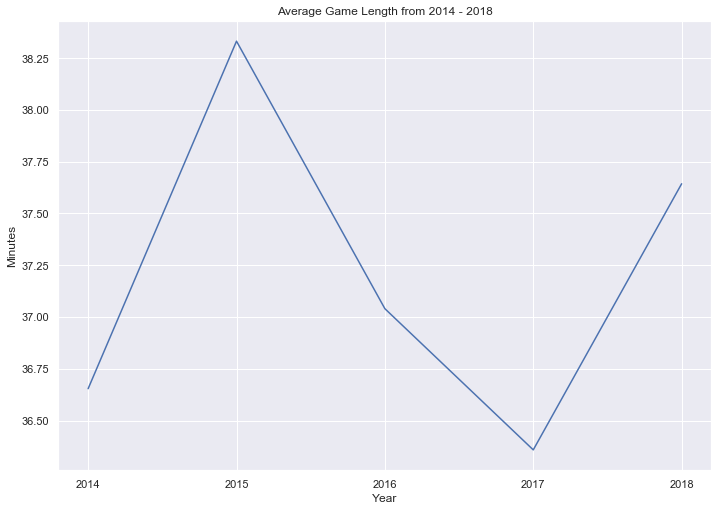

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.lineplot(x=Yr, y=avg_gamelen)
plt.title('Average Game Length from 2014 - 2018')
ax.set(xlabel='Year', ylabel='Minutes')

plt.show()

In this data set, 2014 game data and 2018 game data is kind of lacking. Let's find out why. 

In [8]:
season_4['Type'].unique()

array(['International'], dtype=object)

It looks like 2014 data only contains international matchs, but regular season matches and playoff matches are missing. Now it make sense that 2014 only have 78 match data. Let's look at 2018 data and find out what happened at 2018. 

In [9]:
season_8['Type'].unique()

array(['Season', 'Promotion'], dtype=object)

It looks like 2018 data contains seasonal games and promotion games (from lower league to professional league). However, the number of matches are a lot smaller than 2015, 2016, and 2017. Let's look at 'League" and 'Season' see what matches are played. 

In [10]:
print(season_8['League'].unique())
print(season_8['Season'].unique())

['NALCS' 'EULCS' 'LCK' 'TCL' 'OPL' 'LMS' 'CBLoL' 'CLS']
['Spring']


It looks like the 2018 data only contains some games from the Spring season. Now it make sense that only 241 games are included in the 2018 data. 

# Experiment
Next, we will focus on the average game length for year 2016. As mentioned previously, Rift Herald was introduced to the game on on November 11, 2015(Patch V5.22), and this new in-game monster went live on year 2016 (Season 6). The purpose of adding Rift Herald to the game is to have an in-game monster that is equivalent to dragons in the ealy game (before 20 minutes). Rift Herald spawns at the 9:50 mark. If Rift Herald is not taken, it will be despawned permanently at 19:45/19:55. Once Rift Herald is killed by one of the player, it will become an "Eye of Herald" on the ground. Any member of the same team will be able to pickup the "Eye of Herald", and then later summon the Herald to the game. One of the feature for the summoned Herald is the Herald can due 40% damage of its current health to the tower it charged to. This is a lot of damage to the tower for one charge, and it can lead to faster tower falling, and potentially lead to shorter game length. We will run two experiments here.

The first experiment, we will compare the average game length between 2015 and 2016. 2016 is the first year that 

In [11]:
print(season_5['League'].unique())
print(season_5['Type'].unique())
print(season_5['Season'].unique())

['NALCS' 'EULCS' 'LCK' 'LMS' 'TCL' 'WC' 'MSI' 'IEM']
['Season' 'Playoffs' 'Regional' 'International' 'Promotion']
['Spring' 'Summer']


In [12]:
print(season_6['League'].unique())
print(season_6['Type'].unique())
print(season_6['Season'].unique())

['NALCS' 'EULCS' 'LCK' 'LMS' 'CBLoL' 'TCL' 'OPL' 'LJL' 'LCL' 'WC' 'MSI'
 'IEM']
['Season' 'Playoffs' 'Regional' 'International' 'Promotion']
['Spring' 'Summer']


In [13]:
adjusted_season_6 = season_6.loc[season_6['League'].isin(['NALCS', 'EULCS', 'LCK', 'LMS', 'TCL', 'WC', 'MSI', 'IEM'])]

In [14]:
print('Total number of games for 2015 season is ' + str(len(season_5)))
print('The average for 2015 season is ' + str(round(season_5['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for 2016 season after removing newly added regions is ' + str(len(adjusted_season_6)))
print('The average for 2016 season is ' + str(round(adjusted_season_6['gamelength'].mean(),2)) + ' minutes.')

print(season_5['gamelength'].var())
print(adjusted_season_6['gamelength'].var())
#print(season_6['gamelength'].var())
#print(season_6['gamelength'].mean())
#print(type(season_5['gamelength'].mean(numeric_only=float)))
stats.ttest_ind(season_5['gamelength'], adjusted_season_6['gamelength'], equal_var=False)

Total number of games for 2015 season is 1496
The average for 2015 season is 38.33 minutes.
Total number of games for 2016 season after removing newly added regions is 1881
The average for 2016 season is 37.01 minutes.
60.41709083755111
65.28387967016207


Ttest_indResult(statistic=4.812570909123692, pvalue=1.557776160071502e-06)

In [15]:
NALCS_2015 = season_5.loc[season_5['League'] == 'NALCS']
EULCS_2015 = season_5.loc[season_5['League'] == 'EULCS']
LCK_2015 = season_5.loc[season_5['League'] == 'LCK']
LMS_2015 = season_5.loc[season_5['League'] == 'LMS']
TCL_2015 = season_5.loc[season_5['League'] == 'TCL']
WC_2015 = season_5.loc[season_5['League'] == 'WC']
MSI_2015 = season_5.loc[season_5['League'] == 'MSI']
IEM_2015 = season_5.loc[season_5['League'] == 'IEM']

NALCS_2016 = season_6.loc[season_6['League'] == 'NALCS']
EULCS_2016 = season_6.loc[season_6['League'] == 'EULCS']
LCK_2016 = season_6.loc[season_6['League'] == 'LCK']
LMS_2016 = season_6.loc[season_6['League'] == 'LMS']
TCL_2016 = season_6.loc[season_6['League'] == 'TCL']
WC_2016 = season_6.loc[season_6['League'] == 'WC']
MSI_2016 = season_6.loc[season_6['League'] == 'MSI']
IEM_2016 = season_6.loc[season_6['League'] == 'IEM']

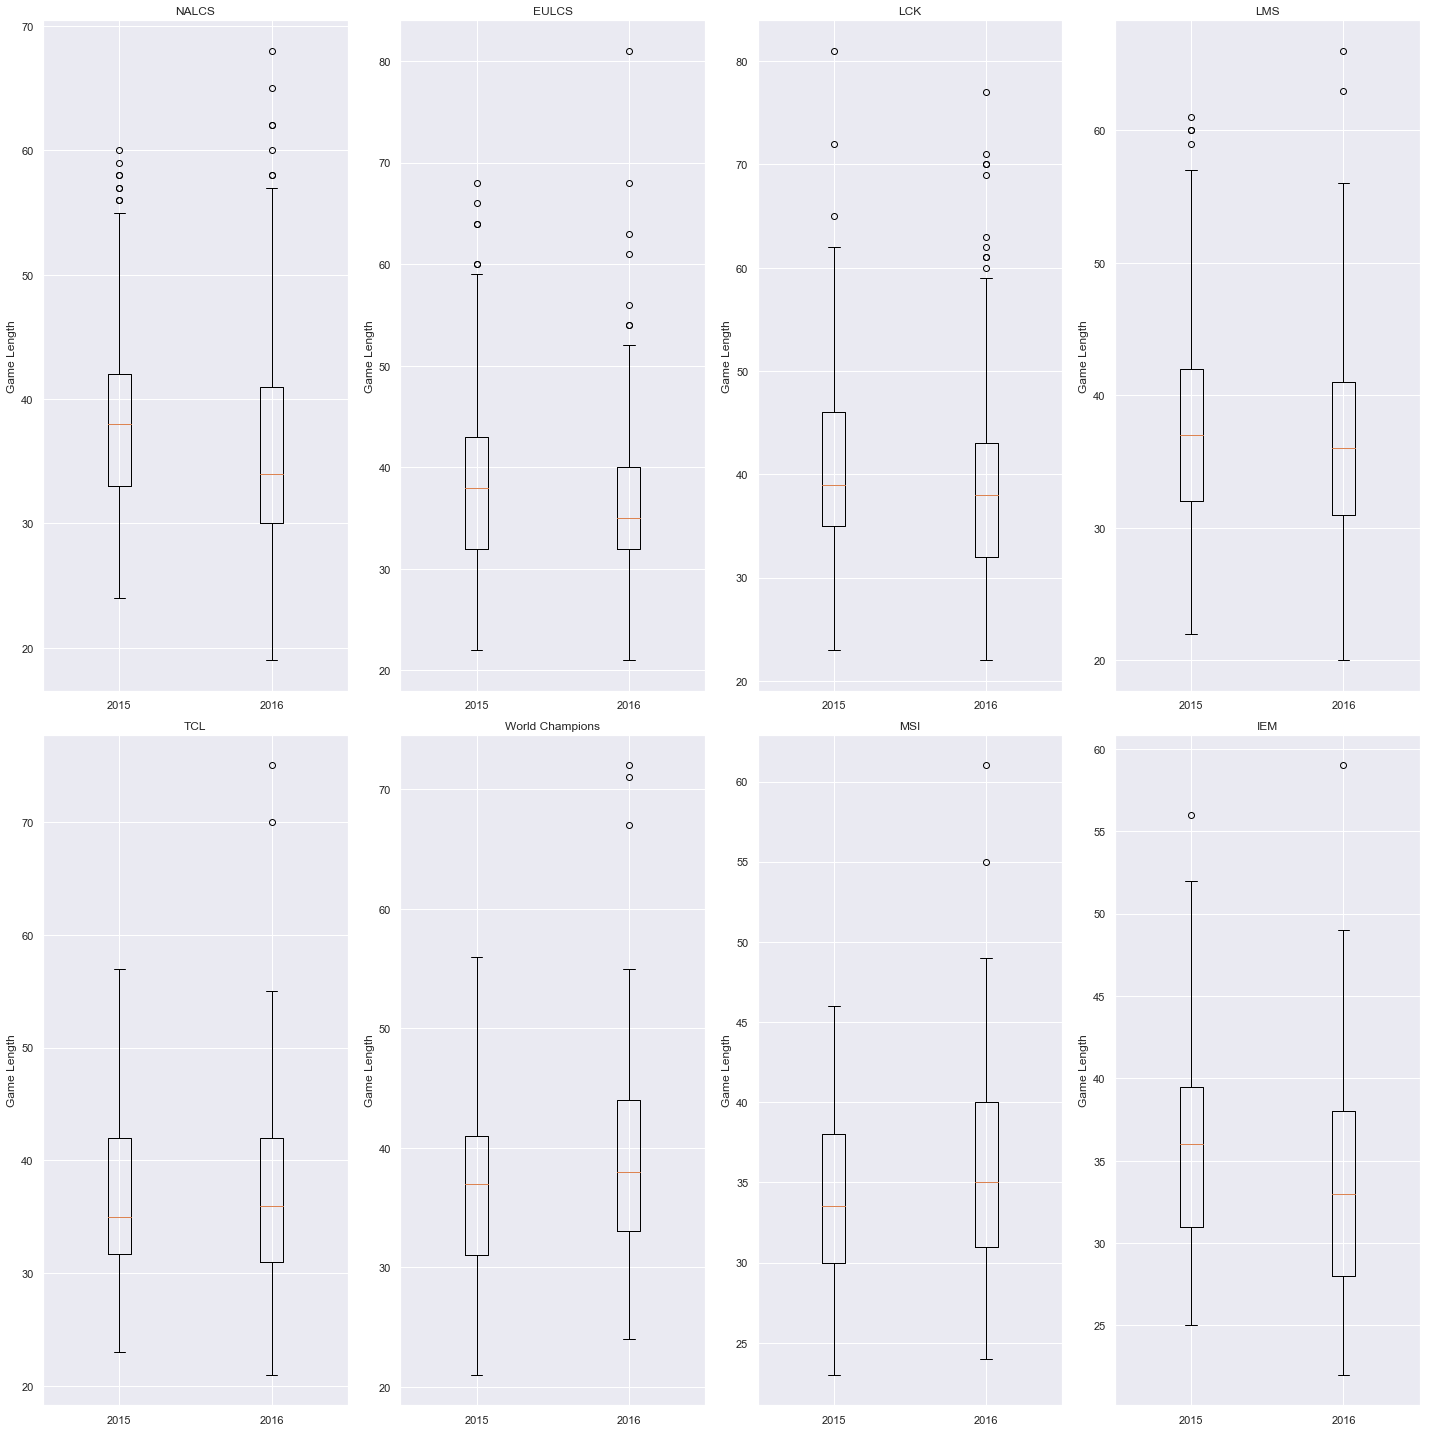

In [67]:
fig = plt.figure(figsize=(20, 20))
G = gridspec.GridSpec(2, 4)

axes_1 = plt.subplot(G[0, 0])
axes_1.boxplot([NALCS_2015['gamelength'], NALCS_2016['gamelength']], meanline=True)
plt.setp(axes_1, xticks=[1,2], xticklabels=['2015','2016'])
axes_1.set_ylabel('Game Length')
axes_1.set_title('NALCS')


axes_2 = plt.subplot(G[0, 1])
axes_2.boxplot([EULCS_2015['gamelength'], EULCS_2016['gamelength']], meanline=True)
plt.setp(axes_2, xticks=[1,2], xticklabels=['2015','2016'])
axes_2.set_ylabel('Game Length')
axes_2.set_title('EULCS')

axes_3 = plt.subplot(G[0, 2])
axes_3.boxplot([LCK_2015['gamelength'], LCK_2016['gamelength']], meanline=True)
plt.setp(axes_3, xticks=[1,2], xticklabels=['2015','2016'])
axes_3.set_ylabel('Game Length')
axes_3.set_title('LCK')

axes_4 = plt.subplot(G[0, 3])
axes_4.boxplot([LMS_2015['gamelength'], LMS_2016['gamelength']], meanline=True)
plt.setp(axes_4, xticks=[1,2], xticklabels=['2015','2016'])
axes_4.set_ylabel('Game Length')
axes_4.set_title('LMS')

axes_5 = plt.subplot(G[1, 0])
axes_5.boxplot([TCL_2015['gamelength'], TCL_2016['gamelength']], meanline=True)
plt.setp(axes_5, xticks=[1,2], xticklabels=['2015','2016'])
axes_5.set_ylabel('Game Length')
axes_5.set_title('TCL')

axes_6 = plt.subplot(G[1, 1])
axes_6.boxplot([WC_2015['gamelength'], WC_2016['gamelength']], meanline=True)
plt.setp(axes_6, xticks=[1,2], xticklabels=['2015','2016'])
axes_6.set_ylabel('Game Length')
axes_6.set_title('World Champions')

axes_7 = plt.subplot(G[1, 2])
axes_7.boxplot([MSI_2015['gamelength'], MSI_2016['gamelength']], meanline=True)
plt.setp(axes_7, xticks=[1,2], xticklabels=['2015','2016'])
axes_7.set_ylabel('Game Length')
axes_7.set_title('MSI')

axes_8 = plt.subplot(G[1, 3])
axes_8.boxplot([IEM_2015['gamelength'], IEM_2016['gamelength']], meanline=True)
plt.setp(axes_8, xticks=[1,2], xticklabels=['2015','2016'])
axes_8.set_ylabel('Game Length')
axes_8.set_title('IEM')

plt.tight_layout()
plt.show()

In [50]:
# Now we compare each region individualy. 

print('Total number of NALCS games for 2015 season is ' + str(len(NALCS_2015)))
print('The average game length for NALCS 2015 season is ' + str(round(NALCS_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of NALCS games for 2016 season  is ' + str(len(NALCS_2016)))
print('The average game length for 2016 season is ' + str(round(NALCS_2016['gamelength'].mean(),2)) + ' minutes.')

print(NALCS_2015['gamelength'].var())
print(NALCS_2016['gamelength'].var())
stats.ttest_ind(NALCS_2015['gamelength'], NALCS_2016['gamelength'], equal_var=False)

Total number of NALCS games for 2015 season is 307
The average game length for NALCS 2015 season is 38.4 minutes.
Total number of NALCS games for 2016 season  is 385
The average game length for 2016 season is 35.89 minutes.
51.20823486832302
61.06098484848477


Ttest_indResult(statistic=4.399658980020216, pvalue=1.2592229258277775e-05)

In [17]:
# Now we compare each region individualy. 

print('Total number of EULCS games for 2015 season is ' + str(len(EULCS_2015)))
print('The average game length for EULCS 2015 season is ' + str(round(EULCS_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of EULCS games for 2016 season  is ' + str(len(EULCS_2016)))
print('The average game length for EULCS 2016 season is ' + str(round(EULCS_2016['gamelength'].mean(),2)) + ' minutes.')

print(EULCS_2015['gamelength'].var())
print(EULCS_2016['gamelength'].var())
stats.ttest_ind(EULCS_2015['gamelength'], EULCS_2016['gamelength'], equal_var=False)

Total number of EULCS games for 2015 season is 299
The average game length for EULCS 2015 season is 38.3 minutes.
Total number of EULCS games for 2016 season  is 358
The average game length for EULCS 2016 season is 36.4 minutes.
63.58694529864629
55.130745035444356


Ttest_indResult(statistic=3.1449598707414976, pvalue=0.0017410644995224135)

In [18]:
print('Total number of LCK games for 2015 season is ' + str(len(LCK_2015)))
print('The average game length for LCK 2015 season is ' + str(round(LCK_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of LCK games for 2016 season  is ' + str(len(LCK_2016)))
print('The average game length for LCK 2016 season is ' + str(round(LCK_2016['gamelength'].mean(),2)) + ' minutes.')

print(LCK_2015['gamelength'].var())
print(LCK_2016['gamelength'].var())
stats.ttest_ind(LCK_2015['gamelength'], LCK_2016['gamelength'], equal_var=False)

Total number of LCK games for 2015 season is 393
The average game length for LCK 2015 season is 40.41 minutes.
Total number of LCK games for 2016 season  is 482
The average game length for LCK 2016 season is 38.71 minutes.
67.48688788492497
74.72211247314979


Ttest_indResult(statistic=2.9697808627668163, pvalue=0.003063653540175743)

In [19]:
print('Total number of LMS games for 2015 season is ' + str(len(LMS_2015)))
print('The average game length for LMS 2015 season is ' + str(round(LMS_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of LMS games for 2016 season  is ' + str(len(LMS_2016)))
print('The average game length for LMS 2016 season is ' + str(round(LMS_2016['gamelength'].mean(),2)) + ' minutes.')

print(LMS_2015['gamelength'].var())
print(LMS_2016['gamelength'].var())
stats.ttest_ind(LMS_2015['gamelength'], LMS_2016['gamelength'], equal_var=False)

Total number of LMS games for 2015 season is 197
The average game length for LMS 2015 season is 37.37 minutes.
Total number of LMS games for 2016 season  is 260
The average game length for LMS 2016 season is 36.67 minutes.
56.43851652336064
55.97640332640328


Ttest_indResult(statistic=0.9954921271013667, pvalue=0.3200684555146407)

In [20]:
print('Total number of TCL games for 2015 season is ' + str(len(TCL_2015)))
print('The average game length for TCL 2015 season is ' + str(round(TCL_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of TCL games for 2016 season  is ' + str(len(TCL_2016)))
print('The average game length for TCL 2016 season is ' + str(round(TCL_2016['gamelength'].mean(),2)) + ' minutes.')

print(TCL_2015['gamelength'].var())
print(TCL_2016['gamelength'].var())
stats.ttest_ind(TCL_2015['gamelength'], TCL_2016['gamelength'], equal_var=False)

Total number of TCL games for 2015 season is 152
The average game length for TCL 2015 season is 36.45 minutes.
Total number of TCL games for 2016 season  is 213
The average game length for TCL 2016 season is 36.99 minutes.
52.89852736144995
62.86783594649663


Ttest_indResult(statistic=-0.6691730880777895, pvalue=0.5038378304148454)

In [21]:
print('Total number of WC games for 2015 season is ' + str(len(WC_2015)))
print('The average game length for WC 2015 season is ' + str(round(WC_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of WC games for 2016 season  is ' + str(len(WC_2016)))
print('The average game length for WC 2016 season is ' + str(round(WC_2016['gamelength'].mean(),2)) + ' minutes.')

print(WC_2015['gamelength'].var())
print(WC_2016['gamelength'].var())
stats.ttest_ind(WC_2015['gamelength'], WC_2016['gamelength'], equal_var=False)

Total number of WC games for 2015 season is 73
The average game length for WC 2015 season is 36.47 minutes.
Total number of WC games for 2016 season  is 77
The average game length for WC 2016 season is 39.04 minutes.
53.05783866057838
88.74846206425153


Ttest_indResult(statistic=-1.877005509377206, pvalue=0.06256419945990793)

In [22]:
print('Total number of MSI games for 2015 season is ' + str(len(MSI_2015)))
print('The average game length for MSI 2015 season is ' + str(round(MSI_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of MSI games for 2016 season  is ' + str(len(MSI_2016)))
print('The average game length for MSI 2016 season is ' + str(round(MSI_2016['gamelength'].mean(),2)) + ' minutes.')

print(MSI_2015['gamelength'].var())
print(MSI_2016['gamelength'].var())
stats.ttest_ind(MSI_2015['gamelength'], MSI_2016['gamelength'], equal_var=False)

Total number of MSI games for 2015 season is 28
The average game length for MSI 2015 season is 33.93 minutes.
Total number of MSI games for 2016 season  is 41
The average game length for MSI 2016 season is 36.32 minutes.
32.8095238095238
65.92195121951218


Ttest_indResult(statistic=-1.432625762109544, pvalue=0.15662093583423373)

In [23]:
print('Total number of IEM games for 2015 season is ' + str(len(IEM_2015)))
print('The average game length for IEM 2015 season is ' + str(round(IEM_2015['gamelength'].mean(),2)) + ' minutes.')
print('Total number of IEM games for 2016 season  is ' + str(len(IEM_2016)))
print('The average game length for IEM 2016 season is ' + str(round(IEM_2016['gamelength'].mean(),2)) + ' minutes.')

print(IEM_2015['gamelength'].var())
print(IEM_2016['gamelength'].var())
stats.ttest_ind(IEM_2015['gamelength'], IEM_2016['gamelength'], equal_var=False)

Total number of IEM games for 2015 season is 47
The average game length for IEM 2015 season is 36.34 minutes.
Total number of IEM games for 2016 season  is 65
The average game length for IEM 2016 season is 33.97 minutes.
45.620721554116564
54.34278846153842


Ttest_indResult(statistic=1.764105766143816, pvalue=0.08065206925076704)

In [24]:
#df['bHeralds'][0] == '[]'

season_6_no_herald = season_6.loc[(season_6['bHeralds'] == '[]') & (season_6['rHeralds'] == '[]')]
season_6_killed_herald = season_6.loc[(season_6['bHeralds'] != '[]') | (season_6['rHeralds'] != '[]')]

print(len(season_6_no_herald))
print(len(season_6_killed_herald))

772
1722


In [25]:
print('Total number of games for 2016 season that both team did not killed the Rift Heralds is ' + str(len(season_6_no_herald)))
print('The average game length for 2016 season that both team did not killed the Rift Heralds is ' + str(round(season_6_no_herald['gamelength'].mean(),2)) + ' minutes.')
print('Total number of games for 2016 season that either team killed the Rift Heralds is ' + str(len(season_6_killed_herald)))
print('The average game length for 2016 season that either team killed the Rift Heralds is ' + str(round(season_6_killed_herald['gamelength'].mean(),2)) + ' minutes.')

print(season_6_no_herald['gamelength'].var())
print(season_6_killed_herald['gamelength'].var())
#print(season_6['gamelength'].var())
#print(season_6['gamelength'].mean())
#print(type(season_5['gamelength'].mean(numeric_only=float)))
stats.ttest_ind(season_6_no_herald['gamelength'], season_6_killed_herald['gamelength'], equal_var=False)

Total number of games for 2016 season that both team did not killed the Rift Heralds is 772
The average game length for 2016 season that both team did not killed the Rift Heralds is 38.01 minutes.
Total number of games for 2016 season that either team killed the Rift Heralds is 1722
The average game length for 2016 season that either team killed the Rift Heralds is 36.6 minutes.
64.11011034723765
65.31068255025549


Ttest_indResult(statistic=4.045687759831853, pvalue=5.4831731505842964e-05)

In [70]:
NALCS_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'NALCS']
EULCS_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'EULCS']
LCK_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'LCK']
LMS_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'LMS']
TCL_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'TCL']
CBLoL_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'CBLoL']
OPL_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'OPL']
LJL_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'LJL']
LCL_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'LCL']
WC_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'WC']
MSI_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'MSI']
IEM_no_herald = season_6_no_herald.loc[season_6_no_herald['League'] == 'IEM']

NALCS_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'NALCS']
EULCS_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'EULCS']
LCK_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'LCK']
LMS_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'LMS']
TCL_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'TCL']
CBLoL_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'CBLoL']
OPL_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'OPL']
LJL_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'LJL']
LCL_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'LCL']
WC_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'WC']
MSI_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'MSI']
IEM_killed_herald = season_6_killed_herald.loc[season_6_killed_herald['League'] == 'IEM']

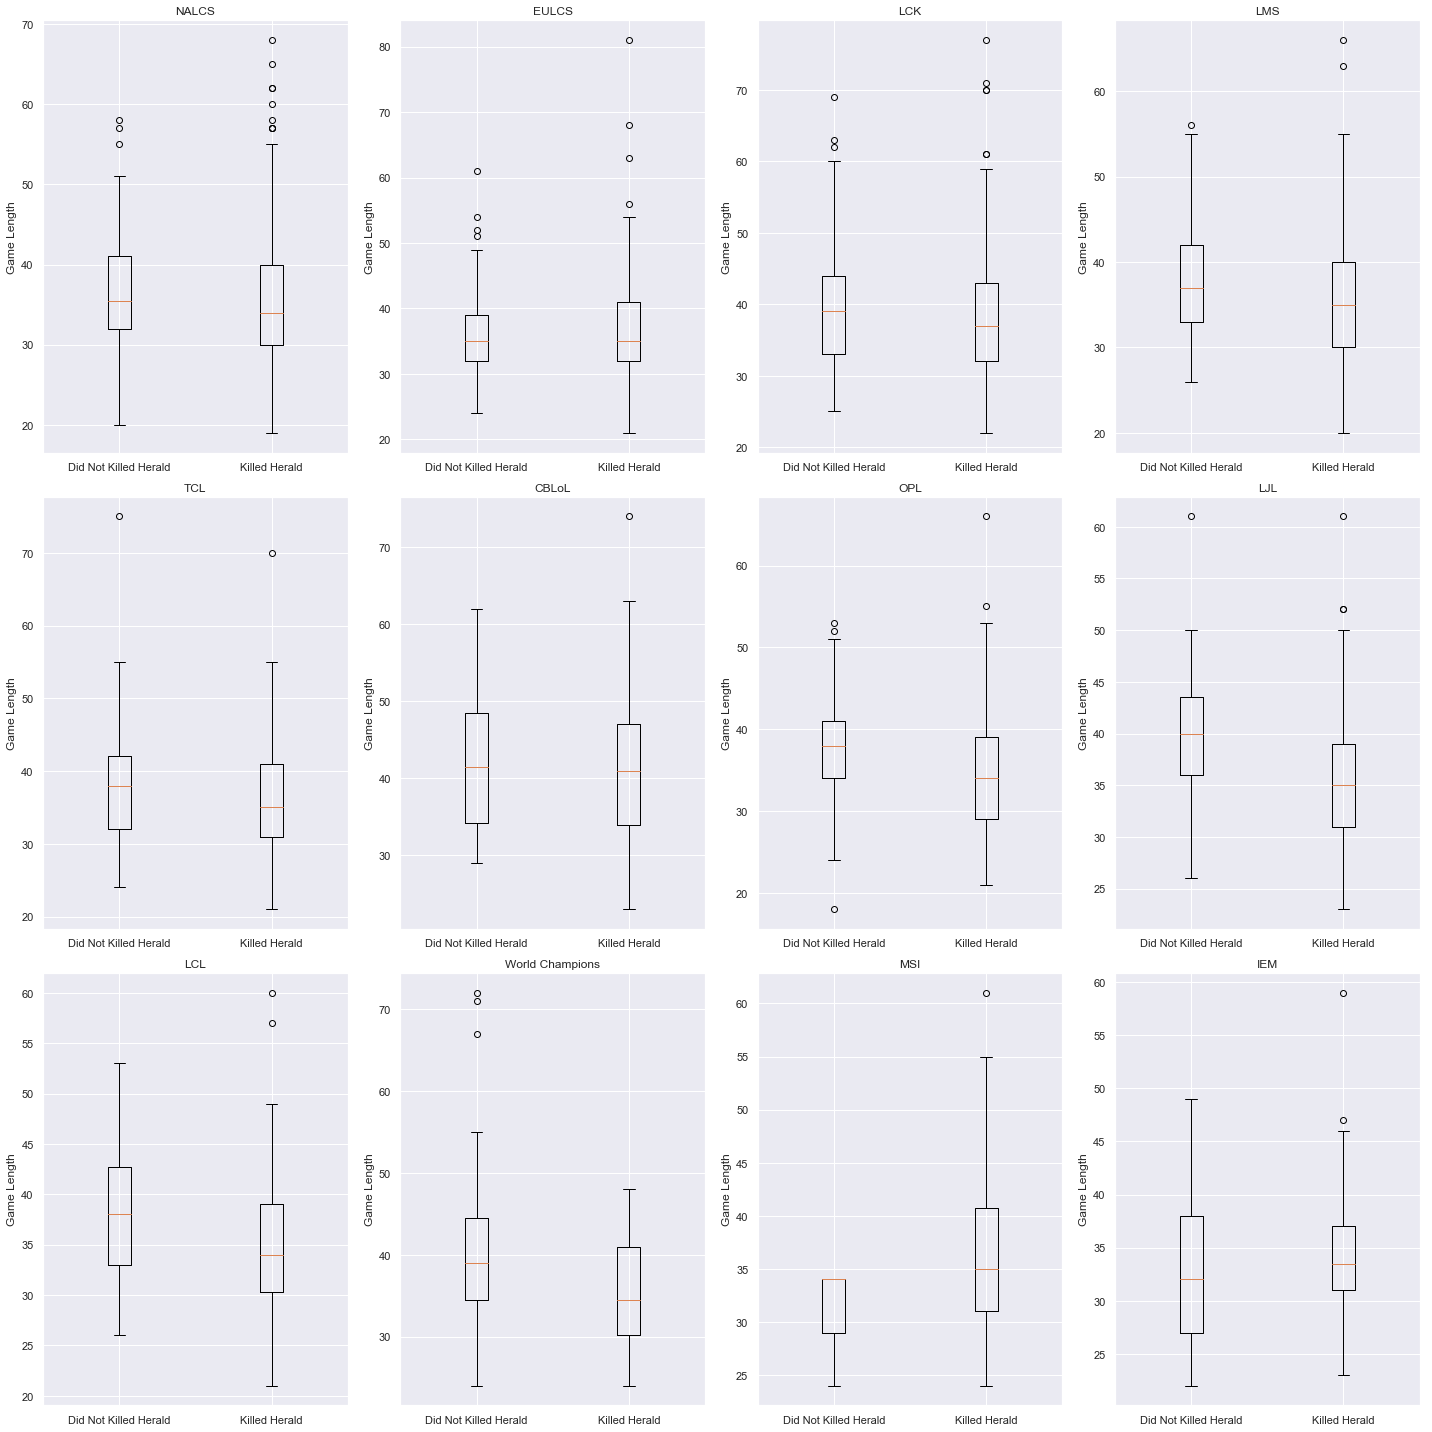

In [72]:
fig = plt.figure(figsize=(20, 20))
G = gridspec.GridSpec(3, 4)

axes_1 = plt.subplot(G[0, 0])
axes_1.boxplot([NALCS_no_herald['gamelength'], NALCS_killed_herald['gamelength']], meanline=True)
plt.setp(axes_1, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_1.set_ylabel('Game Length')
axes_1.set_title('NALCS')


axes_2 = plt.subplot(G[0, 1])
axes_2.boxplot([EULCS_no_herald['gamelength'], EULCS_killed_herald['gamelength']], meanline=True)
plt.setp(axes_2, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_2.set_ylabel('Game Length')
axes_2.set_title('EULCS')

axes_3 = plt.subplot(G[0, 2])
axes_3.boxplot([LCK_no_herald['gamelength'], LCK_killed_herald['gamelength']], meanline=True)
plt.setp(axes_3, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_3.set_ylabel('Game Length')
axes_3.set_title('LCK')

axes_4 = plt.subplot(G[0, 3])
axes_4.boxplot([LMS_no_herald['gamelength'], LMS_killed_herald['gamelength']], meanline=True)
plt.setp(axes_4, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_4.set_ylabel('Game Length')
axes_4.set_title('LMS')

axes_5 = plt.subplot(G[1, 0])
axes_5.boxplot([TCL_no_herald['gamelength'], TCL_killed_herald['gamelength']], meanline=True)
plt.setp(axes_5, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_5.set_ylabel('Game Length')
axes_5.set_title('TCL')

axes_6 = plt.subplot(G[1, 1])
axes_6.boxplot([CBLoL_no_herald['gamelength'], CBLoL_killed_herald['gamelength']], meanline=True)
plt.setp(axes_6, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_6.set_ylabel('Game Length')
axes_6.set_title('CBLoL')

axes_7 = plt.subplot(G[1, 2])
axes_7.boxplot([OPL_no_herald['gamelength'], OPL_killed_herald['gamelength']], meanline=True)
plt.setp(axes_7, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_7.set_ylabel('Game Length')
axes_7.set_title('OPL')

axes_8 = plt.subplot(G[1, 3])
axes_8.boxplot([LJL_no_herald['gamelength'], LJL_killed_herald['gamelength']], meanline=True)
plt.setp(axes_8, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_8.set_ylabel('Game Length')
axes_8.set_title('LJL')

axes_9 = plt.subplot(G[2, 0])
axes_9.boxplot([LCL_no_herald['gamelength'], LCL_killed_herald['gamelength']], meanline=True)
plt.setp(axes_9, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_9.set_ylabel('Game Length')
axes_9.set_title('LCL')

axes_10 = plt.subplot(G[2, 1])
axes_10.boxplot([WC_no_herald['gamelength'], WC_killed_herald['gamelength']], meanline=True)
plt.setp(axes_10, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_10.set_ylabel('Game Length')
axes_10.set_title('World Champions')

axes_11 = plt.subplot(G[2, 2])
axes_11.boxplot([MSI_no_herald['gamelength'], MSI_killed_herald['gamelength']], meanline=True)
plt.setp(axes_11, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_11.set_ylabel('Game Length')
axes_11.set_title('MSI')

axes_12 = plt.subplot(G[2, 3])
axes_12.boxplot([IEM_no_herald['gamelength'], IEM_killed_herald['gamelength']], meanline=True)
plt.setp(axes_12, xticks=[1,2], xticklabels=['Did Not Killed Herald','Killed Herald'])
axes_12.set_ylabel('Game Length')
axes_12.set_title('IEM')

plt.tight_layout()
plt.show()